In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


## Exploratory Data Analysis

In [137]:
us_data = pd.read_csv('../data/USvideos.csv')
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [138]:
'''
most_views = us_data.groupby("channel_title")['views'].sum().sort_values(ascending=False)

most_views_pd = most_views.to_frame().head(10).sort_values(by = 'views', ascending=True)

most_views_pd

'''

'\nmost_views = us_data.groupby("channel_title")[\'views\'].sum().sort_values(ascending=False)\n\nmost_views_pd = most_views.to_frame().head(10).sort_values(by = \'views\', ascending=True)\n\nmost_views_pd\n\n'

In [139]:
most_views = us_data.groupby("channel_title")['views', 'video_id'].max().sort_values(by = 'views', ascending=False)

most_views_pd = most_views.head(10).sort_values(by = 'views', ascending=True)

most_views_pd

C:\Users\joshy\AppData\Local\Temp\ipykernel_25872\377086844.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_views = us_data.groupby("channel_title")['views', 'video_id'].max().sort_values(by = 'views', ascending=False)


,views,video_id
channel_title,,
MalumaVEVO,87264467,vjI4Alon-3Q
Marvel Entertainment,91933007,trcditUaQJg
Cardi B,94254507,xTlNMmZKwpA
LuisFonsiVEVO,102012605,TyHvyGVs42U
TheWeekndVEVO,122544931,M4ZoCHID9GI
ibighit,123010920,p8npDG2ulKQ
BeckyGVEVO,139334502,zEf423kYfqk
ArianaGrandeVevo,148689896,vRf3azp1pak
YouTube Spotlight,149376127,GnGPAYvve1A


Text(0.5, 1.0, 'The Most Viewed YouTube Channels (Nov 2017 - Jun 2018)')

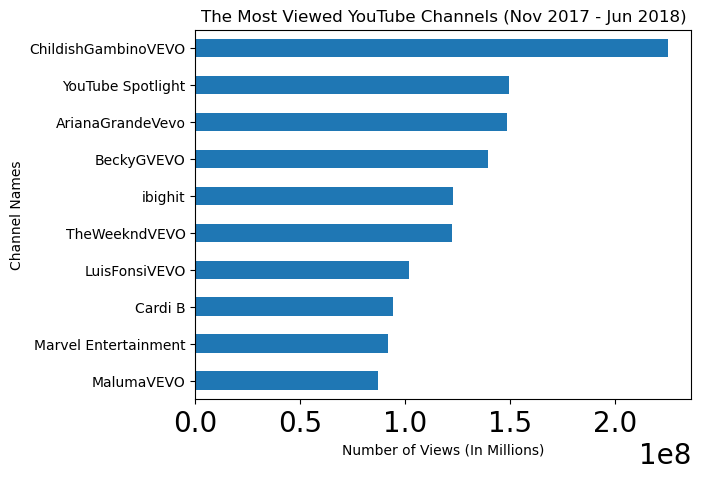

In [140]:
most_views_pd['views'].plot(kind="barh")


plt.xlabel('Number of Views (In Millions)')
plt.ylabel('Channel Names')
plt.title('The Most Viewed YouTube Channels (Nov 2017 - Jun 2018)')
#plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))
#plt.yticks(np.arange(0, 81, 10))
#plt.legend((p1[0], p2[0]), ('', 'girls'))

In [145]:
category_id = us_data.groupby("category_id")['views'].max().sort_values(ascending = True)
category_id_c = us_data.groupby("category_id")['comment_count'].max().sort_values(ascending = True)

category_id



category_id
43      1445949
15      6187457
27      7349435
25     10277358
20     16935442
19     23932421
29     24286474
2      25244097
17     29090799
23     29178096
28     42799458
26     54155921
1      54863912
22     56111957
24    149376127
10    225211923
Name: views, dtype: int64

In [142]:
import json
#uploading JSON file to see video categories
f = open('../data/US_category_id.json')
data = json.load(f)


category_df = pd.json_normalize(data, record_path =['items'])
category_df = category_df[category_df['snippet.assignable'] == True]
category_df.drop(['kind', 'etag', 'snippet.channelId', 'snippet.assignable'], axis=1, inplace=True)
category_df.set_index('id')
title_lst = category_df['snippet.title'].to_list()
title_lst



['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Travel & Events',
 'Gaming',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Shows']

In [143]:
# category_id.plot(kind="bar")
# plt.xticks(rotation = 0)
# plt.ylabel('Number of Views (In Billions)')
# plt.xlabel('Category ID')
# plt.title('The Most Popular Video Categories in 2011')

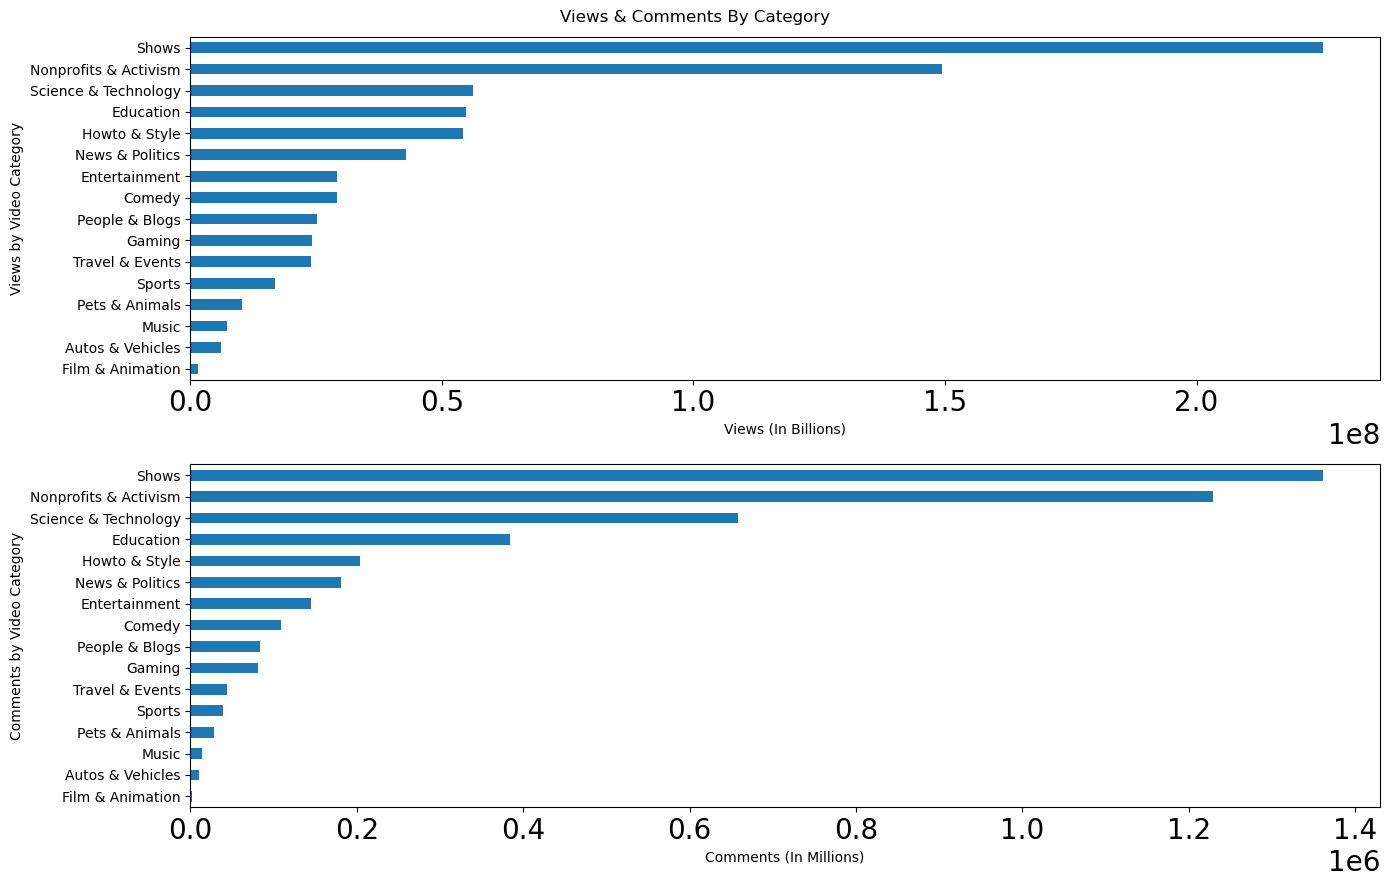

In [144]:


# To label charts#
fig, axs = plt.subplots(2)
fig.set_size_inches(14,9)
category_id.plot.barh(ax=axs[0])
category_id_c.plot.barh(ax=axs[1])
fig.suptitle("Views & Comments By Category")
matplotlib.rc('xtick', labelsize=20) 
axs[0].set_ylabel("Views by Video Category")
axs[1].set_ylabel("Comments by Video Category")
axs[0].set_xlabel("Views (In Billions)")
axs[1].set_xlabel("Comments (In Millions)")
# plt.figure(figsize = (25,9))


# To shift xticks to appear horizontal#
axs[0].set(yticklabels = title_lst)
axs[1].set(yticklabels = title_lst)
# for tick in axs[0].get_xticklabels():
#          tick.set_rotation(45)

# for tick in axs[1].get_xticklabels():
#         tick.set_rotation(45)

# To batten down #
fig.tight_layout()


